# Week 6 : Artificial neural network in PyTorch
```
- Machine Learning, Innopolis University (Fall semester 2023)
- Professor: Adil Khan
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>

In this lab, you will practice simple deep learning model in Pytorch.
```
Lab Plan
1. Theoretical issues with ANNs
2. Deep learning frameworks
3. Introduction to Pytorch : Linear Regression with Pytorch
3. Simple ANN model for classification
4. Training ANNs
```

<hr>


## 1. Theoretical issues
Ordinary fully connected neural nets consists of Dense layers, activations, and output layer.

1. What's the difference between deep learning and normal machine learning?
2. How does a neural network with no hidden layers and one output neuron compare to a logistic/linear regression?
3. Can the perceptron find a non-linear decision boundary?
4. In multi-hidden layers network, what's the need of non-linear activation function?
5. Is random weight assignment better than assigning same weights to the units in the hidden layer.
---

## 2. Deep learning framework : PyTorch

Getting started with Pytorch

## 2.1 Linear Regression with Numpy

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Data Generation
def generate_data(size = 100):
    x = np.random.rand(size, 1)
    y = 3 + 2.5 * x + .1 * np.random.randn(size, 1)

    # Shuffles the indices
    idx = np.arange(size)
    np.random.shuffle(idx)

    # split to train and validation 80:20
    split = int(size * 0.8)
    train_idx = idx[:split]
    val_idx = idx[split:]

    # Generate train and validation sets
    x_train, y_train = x[train_idx], y[train_idx]
    x_val, y_val = x[val_idx], y[val_idx]

    return x_train, y_train, x_val, y_val

## Generate Dataset

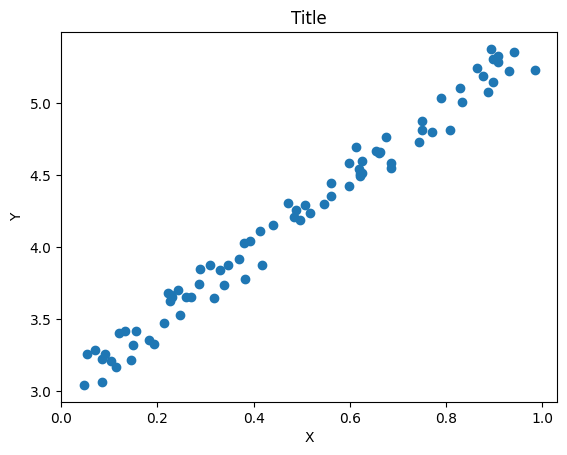

In [3]:
x_train, y_train, x_val, y_val = generate_data()
plt.scatter(x_train, y_train)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Title")
plt.show()

## Gradient Descent algorithm

Gradient descent consist of 3 basic steps :

1. **Compute the Loss**

$$ \hat{y} = a + bx + \epsilon $$

$$ \text{MSE} = \frac{1}{N} \sum_{i} (y_i - \hat{y}_i)^2 $$

$$ \text{MSE} = \frac{1}{N} \sum_{i} (y_i - a - bx_i)^2 $$

2. **Compute the Gradients** : A gradient is a partial derivative. Using the chain rule the final expression came to be :

$$\frac{\partial \text{MSE}}{\partial a} = \frac{\partial \text{MSE}}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial a} = -2 * \frac{1}{N} \sum_{i} (y_i - \hat{y}_i)$$

$$\frac{\partial \text{MSE}}{\partial b} = \frac{\partial \text{MSE}}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial b} = -2 * \frac{1}{N} \sum_{i} x_i(y_i - \hat{y}_i)$$

3. **Update the Parameters**

$$a = a - \alpha \frac{\partial \text{MSE}}{\partial a}$$

$$b = b - \alpha \frac{\partial \text{MSE}}{\partial b}$$

4. Repeat step 1 to 3 till convergence is reached

## Linear Regression model training

In [12]:
# Initializes parameters "a" and "b" randomly
from sklearn.metrics import mean_squared_error as mse, accuracy_score as accs


a = np.random.randn(1)
b = np.random.randn(1)

print(f"Initial values of [a, b] : [{a[0]}, {b[0]}]")

learning_rate = 1e-1 #learning rate
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1: Computes y hat
    yhat = a + b * x_train

    n = len(x_train)

    # Compute error and Loss using MSE
    error = y_train - yhat
    loss = np.sum(error ** 2) * 1 / n

    # Step 2: Compute gradients for both "a" and "b" parameters (partial derivatives)
    a_grad = -2 * np.sum(y_train - yhat) * 1 / n
    b_grad = -2 * np.sum(x_train * (y_train - yhat)) * 1 / n

    # Step 3: Update parameters using gradients and the learning rate
    a = a - learning_rate * a_grad
    b = b - learning_rate * b_grad

    print(f"Loss: {loss}")


print(f"Final values of [a, b] : [{a[0]}, {b[0]}]")

Initial values of [a, b] : [-0.6130691032963048, 0.7806381924767629]
Loss: 19.861020430019448
Loss: 11.182648487505096
Loss: 6.298240062630126
Loss: 3.5491636766814323
Loss: 2.0019026311287127
Loss: 1.1310518289055937
Loss: 0.6409009521312428
Loss: 0.36501729089688517
Loss: 0.2097286046566639
Loss: 0.12231395136392684
Loss: 0.07310074022273343
Loss: 0.04538853317200738
Loss: 0.029777924083059328
Loss: 0.020978698987345463
Loss: 0.01601339380388831
Loss: 0.013206214499775926
Loss: 0.01161397764377245
Loss: 0.010705830402045818
Loss: 0.010182989437555124
Loss: 0.009877285731765795
Loss: 0.009694063227436031
Loss: 0.009580040842030933
Loss: 0.009505224451572718
Loss: 0.009452726527392746
Loss: 0.009413036385446239
Loss: 0.009380795344821957
Loss: 0.009352981707965108
Loss: 0.009327889221698915
Loss: 0.009304552127923596
Loss: 0.009282421565533905
Loss: 0.009261183438770578
Loss: 0.009240655906270715
Loss: 0.00922073168258516
Loss: 0.009201345561272462
Loss: 0.009182456133354854
Loss: 0.00

## Pytorch basics

### Tensors

* How to create a Tensor
* Operations on tensors
* Data types for Tensors### Create a Tensor

Create tensors from Numpy then see what operations can be applied.
**Note:** By default a tensor resides in cpu but can be sent to the GPU for fatser computations

In [ ]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train_tensor = torch.from_numpy(x_train).to(device)
y_train_tensor = torch.from_numpy(y_train).to(device)

# Here we can see the difference - notice that .type() is more useful
# since it tells WHERE the tensor device

print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.cuda.DoubleTensor


## Linear Regression (Numpy -> PyTorch)

In [ ]:
a = torch.randn(1, device=device, requires_grad=False)
b = torch.randn(1, device=device, requires_grad=False)

print(f"Initial values of [a, b] : [{a[0]}, {b[0]}]")

x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

for epoch in range(100):
  # TODO Implement
  pass

print(f"Final values of [a, b] : [{a[0]}, {b[0]}]")

Initial values of [a, b] : [1.3645294904708862, 0.05897846817970276]
Final values of [a, b] : [3.215078353881836, 2.094226121902466]


## Linear Regression PyTorch

In [ ]:
from torch import nn
import torch.optim as optim # for optimizer
from torch.utils.tensorboard import SummaryWriter #for Tensorboard

class LinearRegression(nn.Module):
  def __init__(self,input_dim=1,output_dim=1):
    super(LinearRegression, self).__init__()
    self.layer1 = None
  def forward(self, x):
    x = self.layer1(x)
    return x

### 2.1 Feed Forward Neural Network
An artificial neural network wherein connections between the nodes do not form a cycle.
<!--![alt text](https://upload.wikimedia.org/wikipedia/en/5/54/Feed_forward_neural_net.gif)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/2294px-Artificial_neural_network.svg.png)-->

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/2294px-Artificial_neural_network.svg.png" width="1000"/>
</div>


### Model Design in Pytorch
we have three simple parts that we need to build:
1. Data Loading process.
2. Model building.
3. the training loops.

<strong>Data Loading</strong>

Data Loading in pytorch is very easy and broken into 3 steps:
1. Data Source
2. Data Transformations
3. Data Loader



## 3. Loading data

Pytorch uses data loading utility which is called `DataLoader` that supports:
automatic batching, transformation, single- and multi-process data loading and more..

In [ ]:
from torchvision import datasets, transforms
from torch. utils.data import DataLoader

batch_size = 32
test_batch_size = 100

data_transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

mnist_train = datasets.MNIST('./data', train=True, download=True,
                       transform=data_transformations)
mnist_test = datasets.MNIST('./data', train=False,
                            transform=data_transformations)

train_loader = DataLoader(mnist_train,
                          batch_size=batch_size, shuffle=True)
test_loader = DataLoader(mnist_test,
                         batch_size=test_batch_size, shuffle=True)

In [ ]:
import matplotlib.pyplot as plt
images, labels = next(iter(train_loader))
plt.imshow(images[0].reshape(28,28), cmap="gray")

## 4. Model building
1. Defining components: <br/>
This step is done in the constructor, where you will define the layers that will be used accordingly in the next step.
2. Network flow: <br/>
This step is done in the forward function. Where you will get the input batch as an argument then you will use the defined layers in the previous step to define the flow of the network then you will return the output batch.


Pytorch is a dynamic framework, where you can use primitive python keywords with it.
You can use if and while statements. Also, it can accepts and returns more than one batch.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        # Write 3 lines to define 3 more linear layers.
        # 2 hidden layers with number of neurons numbers: 250 and 100
        # 1 output layer that should output 10 neurons, one for each class.
        self.fc2 = None
        self.fc3 = None
        self.fc4 = None


    def forward(self, x):
        # the linear layers fc1, fc2, fc3, and fc4
        # accepts only flattened input (1D batches)
        # while the batch x is of size (batch, 28 * 28)
        # define one line to flatten the x to be of size (batch_sz, 28 * 28)
        x = x.view(-1, 28*28)
        return F.log_softmax(x, dim=1)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)

## 5. Training loops
After that we should define the loops over tha batches and run the training on.

In [ ]:
# Define training params
epochs = 10
lr = 0.01
momentum = 0.5
log_interval = 10

## 5.1 Define the training procedure

In [ ]:
def train( model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = torch.nn.functional.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))

## 5.2 Define the evaluation procedure

In [ ]:
def test( model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            # Do the same that was done in the previous function.
            # But without backprobagating the loss and without running the optimizers
            # As this function is only for test.
            # write 3 lines to transform the data to the device, get the output and compute the loss
            data, target = None, None
            output = None
            test_loss += torch.nn.functional.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

## 5.3 Training Model

In [ ]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)


for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

## 6. Save model

## <center>Self-practice <center>

Using Dataset from assignment 1
1. Define, train and evaluate an ANN for Regression and Classification
1. Plot the loss and accuracy of the model for each training iteration
    
ANN should be implemented in PyTorch